Income Statement:
           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-03-31                         0.0           0.245467   1786770000000.0   
2023-03-31                         0.0            0.21666   1539200000000.0   
2022-03-31                8188344000.0             0.2004   1222880000000.0   
2021-03-31                3659070000.0             0.0345    893340000000.0   
2020-03-31                         NaN                NaN               NaN   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
2024-03-31       16560000000.0                          16560000000.0   
2023-03-31      -14580000000.0                         -14580000000.0   
2022-03-31       40860000000.0                          40860000000.0   
2021-03-31      106060000000.0                         106060000000.0   
2020-03-31                 NaN                                    NaN   

           Net Income From Continuing Operation Net Minority Interes

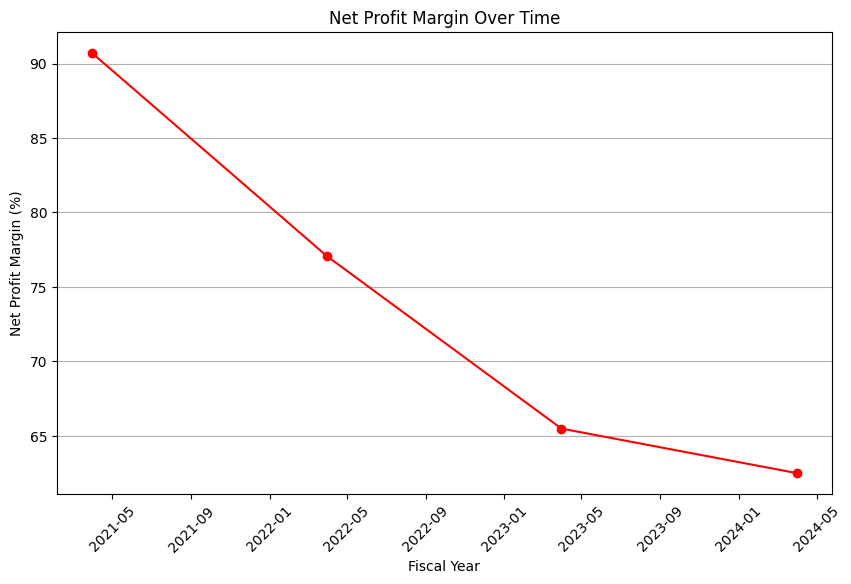

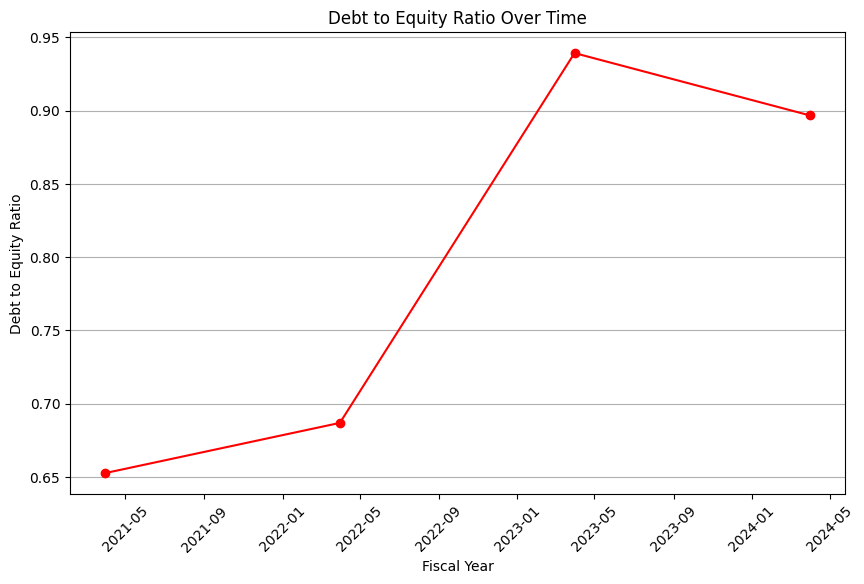

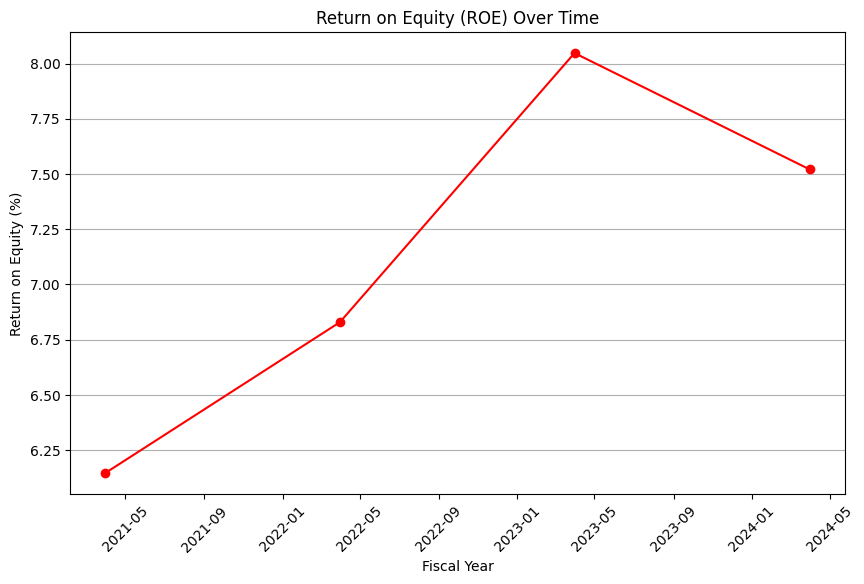

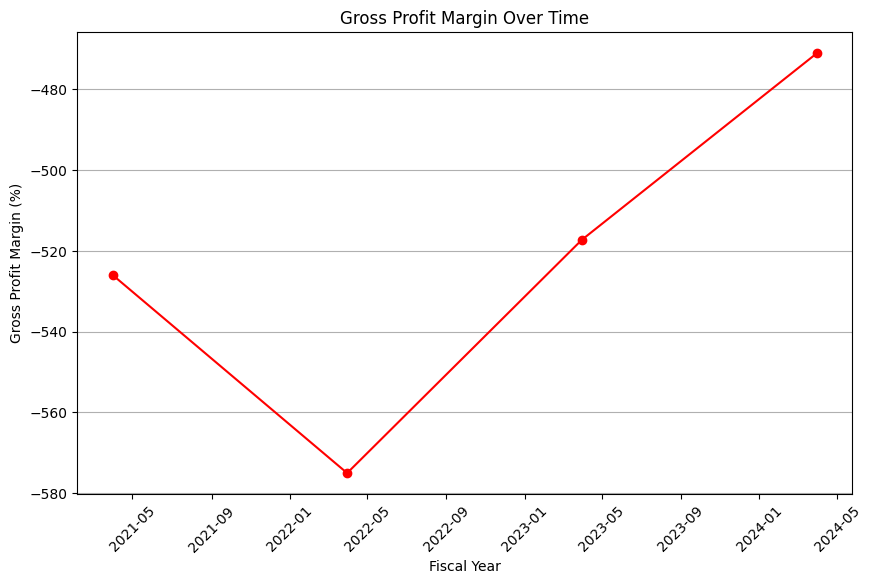

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbol = "RELIANCE.NS"  

reliance = yf.Ticker(symbol)

income_df = reliance.financials.transpose()  # Income Statement
balance_df = reliance.balance_sheet.transpose()  # Balance Sheet
cash_flow_df = reliance.cashflow.transpose()  # Cash Flow
print("Income Statement:")
print(income_df)
print("\nBalance Sheet:")
print(balance_df)
print("\nCash Flow Statement:")
print(cash_flow_df)

income_df.reset_index(inplace=True)
balance_df.reset_index(inplace=True)
cash_flow_df.reset_index(inplace=True)
income_df['Gross Profit Margin'] = (income_df['Total Revenue'] - income_df['Cost Of Revenue']) / income_df['Total Revenue'] * 100
print("\nIncome Statement with Gross Profit Margin:")
print(income_df[['index', 'Total Revenue', 'Cost Of Revenue', 'Gross Profit Margin']])
income_df.rename(columns={'index': 'Fiscal Date'}, inplace=True)
balance_df.rename(columns={'index': 'Fiscal Date'}, inplace=True)
cash_flow_df.rename(columns={'index': 'Fiscal Date'}, inplace=True)

print("\nPrepared Income Statement:")
print(income_df.head())

print("\nPrepared Balance Sheet:")
print(balance_df.head())

print("\nPrepared Cash Flow Statement:")
print(cash_flow_df.head())
print("\nIncome Statement Columns:")
print(income_df.columns)

print("\nBalance Sheet Columns:")
print(balance_df.columns)

print("\nCash Flow Statement Columns:")
print(cash_flow_df.columns)
income_df['Net Profit Margin'] = (income_df['Net Income'] / income_df['Operating Income']) * 100

if 'Reconciled Cost Of Revenue' in income_df.columns and 'Operating Income' in income_df.columns:
    income_df['Gross Profit Margin'] = ((income_df['Operating Income'] - income_df['Reconciled Cost Of Revenue']) / income_df['Operating Income']) * 100

print("\nUpdated Profitability Ratios in Income Statement:")
print(income_df[['Fiscal Date', 'Net Profit Margin', 'Gross Profit Margin']].head())
if 'Total Liabilities Net Minority Interest' in balance_df.columns and 'Total Equity Gross Minority Interest' in balance_df.columns:
    balance_df['Debt to Equity Ratio'] = balance_df['Total Liabilities Net Minority Interest'] / balance_df['Total Equity Gross Minority Interest']

if 'Total Equity Gross Minority Interest' in balance_df.columns and 'Net Income' in income_df.columns:
    balance_df['ROE'] = (income_df['Net Income'] / balance_df['Total Equity Gross Minority Interest']) * 100

print("\nUpdated Solvency and Efficiency Ratios in Balance Sheet:")
print(balance_df[['Fiscal Date', 'Debt to Equity Ratio', 'ROE']].head())
def plot_line_chart(df, x, y, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.plot(df[x], df[y], marker='o', linestyle='-', color='r')
    plt.title(title)
    plt.xlabel('Fiscal Year')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

if 'Net Profit Margin' in income_df.columns:
    plot_line_chart(income_df, 'Fiscal Date', 'Net Profit Margin', 'Net Profit Margin Over Time', 'Net Profit Margin (%)')

if 'Debt to Equity Ratio' in balance_df.columns:
    plot_line_chart(balance_df, 'Fiscal Date', 'Debt to Equity Ratio', 'Debt to Equity Ratio Over Time', 'Debt to Equity Ratio')

if 'ROE' in balance_df.columns:
    plot_line_chart(balance_df, 'Fiscal Date', 'ROE', 'Return on Equity (ROE) Over Time', 'Return on Equity (%)')

if 'Gross Profit Margin' in income_df.columns:
    plot_line_chart(income_df, 'Fiscal Date', 'Gross Profit Margin', 'Gross Profit Margin Over Time', 'Gross Profit Margin (%)')
